## Question 2(Kohonen Network):
Consider a Kohonen network with 100 neurons arranged in the form of a two-dimensional lattice with 10 rows and 10 columns .  \
The network is required to classify two-dimensional input vectors such that each neuron in the network should respond only to the input vectors occurring in its region. \
Train the network with 1500 two-dimensional input vectors generated randomly in a square region in the interval between -1 and +1. Select initial synaptic weights randomly in the same interval  (-1 and +1  ) and take the learning rate parameter α is equal to 0.1.


Test the performance of the self organizing neurons using the following Input vectors: \

X1=[0.1  0.8]$^T$, \
X2=[0.5  -0.2]$^T$, \
X3=[-0.8  -0.9]$^T$, \
X4=[-0.0.6  0.9]$^T$.

In [79]:
#loading required packages
import numpy as np
import matplotlib.pyplot as plt

### Euclidean Distance :

In [106]:
def distance(x,w):
    return np.sqrt(np.sum((x-w)**2))

### Intializing X:
1.X is 2-D. \
2.1500 input vector generated. \
3.interval between -1 and +1.

In [107]:
#generating values of x
X=[]
for i in range(1500):
    x_i = np.random.random((2))*2-1         #range -1 to 1
    X.append(x_i.T)

### Initializing W(-1 to +1 ):

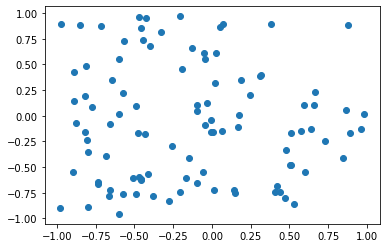

In [117]:
#generating weight values for 100 neurons
W=[]
for i in range(100):
    w_i = np.random.random((2))*2-1      #ranges -1 to 1
    W.append(w_i.T)

plt.scatter(np.array(W)[:,0],np.array(W)[:,1])

In [118]:
print(W[:10])

[array([-0.8894966 ,  0.14564967]), array([-0.50744305, -0.60236279]), array([-0.19044732,  0.45351672]), array([0.98338701, 0.01711666]), array([-0.73492905, -0.65053482]), array([-0.04340426,  0.55418056]), array([ 0.57299008, -0.14946118]), array([0.02428003, 0.60952017]), array([-0.88762746,  0.42404395]), array([-0.64455581,  0.35302472])]


## function to Train Kohen network :
\begin{equation}
j_x(p) = min_j ||X-W_jp||
\end{equation}

Updating weight ->
\begin{equation}
W_{ij}(p+1) = W_{ij} + \Delta W_{ij} \\
\Delta W_{ij} = \alpha(x_i-w_{ij}(p) ,\ j \in \Lambda_p \ else \ 0
\end{equation}

In [197]:
def trainKohenNetwork(X,W,epoch=100,alpha=0.1):
    for i in range(epoch):
        for x_i in X:
            min_d=1e+20
            pos  = -1
            for j in range(len(W)):
                
                d = distance(x_i,W[j])
                if d<min_d:
                    min_d = d
                    pos   = j
            
            
            
            W[pos] = W[pos] +(alpha*(X[pos]-W[pos]))
            
            
        if i%5==0:
            print("j ->",pos,"\ndw->",(alpha*(X[pos]-W[pos])))
            print("----------------------------------------------")
            print("Epoch :",i+1,end="\n\n\n")
            

    return W

### Training Kohen Network

In [198]:
w = trainKohenNetwork(X,W[:],epoch=100)

j -> 4 
dw-> [0.02484313 0.00840641]
----------------------------------------------
Epoch : 1


j -> 90 
dw-> [1.03013477e-03 4.69593682e-05]
----------------------------------------------
Epoch : 6


j -> 90 
dw-> [7.39531679e-05 3.37120359e-06]
----------------------------------------------
Epoch : 11


j -> 90 
dw-> [5.30908304e-06 2.42018027e-07]
----------------------------------------------
Epoch : 16


j -> 90 
dw-> [3.81138003e-07 1.73744255e-08]
----------------------------------------------
Epoch : 21


j -> 90 
dw-> [2.73618206e-08 1.24730651e-09]
----------------------------------------------
Epoch : 26


j -> 90 
dw-> [1.96429958e-09 8.95438834e-11]
----------------------------------------------
Epoch : 31


j -> 90 
dw-> [1.41016665e-10 6.42833703e-12]
----------------------------------------------
Epoch : 36


j -> 90 
dw-> [1.01235575e-11 4.61487792e-13]
----------------------------------------------
Epoch : 41


j -> 90 
dw-> [7.26774196e-13 3.31290551e-14]
-----------

## Testing Kohen Network :

In [200]:
#Testing input vetor:
x1=np.array([[0.1,0.8]]).T 
x2=np.array([[0.5,-0.2]]).T
x3=np.array([[-0.8,-0.9]]).T
x4=np.array([[-0.6,0.9]]).T  


In [207]:
def predict(w,x):
    act = np.sum(x.T*w,axis=1)[:]
    m = max(act)
    return np.where(act==m)[0][0]


In [208]:
print("Neuron no ->",predict(w,x1))

Neuron no -> 31


In [209]:
print("Neuron no ->",predict(w,x2))

Neuron no -> 92


In [210]:
print("Neuron no ->",predict(w,x3))

Neuron no -> 36


In [211]:
print("Neuron no ->",predict(w,x4))

Neuron no -> 11


# Analysis :
<ul>
    <li>with decreasing value of $\alpha$ , epoch to train increases</li>
    <li>With testing data, neuron fire for weight learned from training.</li>
    <li>Competative learning is used here to update weights.</li>
    
</ul>